<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/Heart_Knn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
# loading dataset
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### EDA:
- Number of columns: 15
- Column names: ['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs','RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']
- Number of records: 303
- Missing values: Ca - 4, Thal: 2

### Column Descriptions:
- **Age**: Age of the patient.
- **Sex**: Sex of the patient (0 = female, 1 = male).
- **ChestPain**: Type of chest pain experienced (0 = asymptomatic, 1 = nonanginal, 2 = nontypical, 3 = typical).
- **RestBP**: Resting blood pressure (in mm Hg).
- **Chol**: Serum cholesterol in mg/dl.
- **Fbs**: Fasting blood sugar > 120 mg/dl (0 = false, 1 = true).
- **RestECG**: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).
- **MaxHR**: Maximum heart rate achieved.
- **ExAng**: Exercise induced angina (0 = no, 1 = yes).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **Slope**: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
- **Ca**: Number of major vessels (0-3) colored by fluoroscopy.
- **Thal**: Thalassemia (0 = fixed defect, 1 = normal, 2 = reversable defect).
- **AHD**: Diagnosis of heart disease (angiographic disease status) (0 = No, 1 = Yes).

In [5]:
# EDA
print(df.columns)
df.info()

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64

In [6]:
# Dropping: Unnamed: 0
df = df.iloc[:, 1:]
df.head()
df.dropna(how = 'any', inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [7]:
# Description of dataset
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [8]:
# label encoding object datatype features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_cols = [cols for cols in df.select_dtypes(include="object")]

for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


<Axes: >

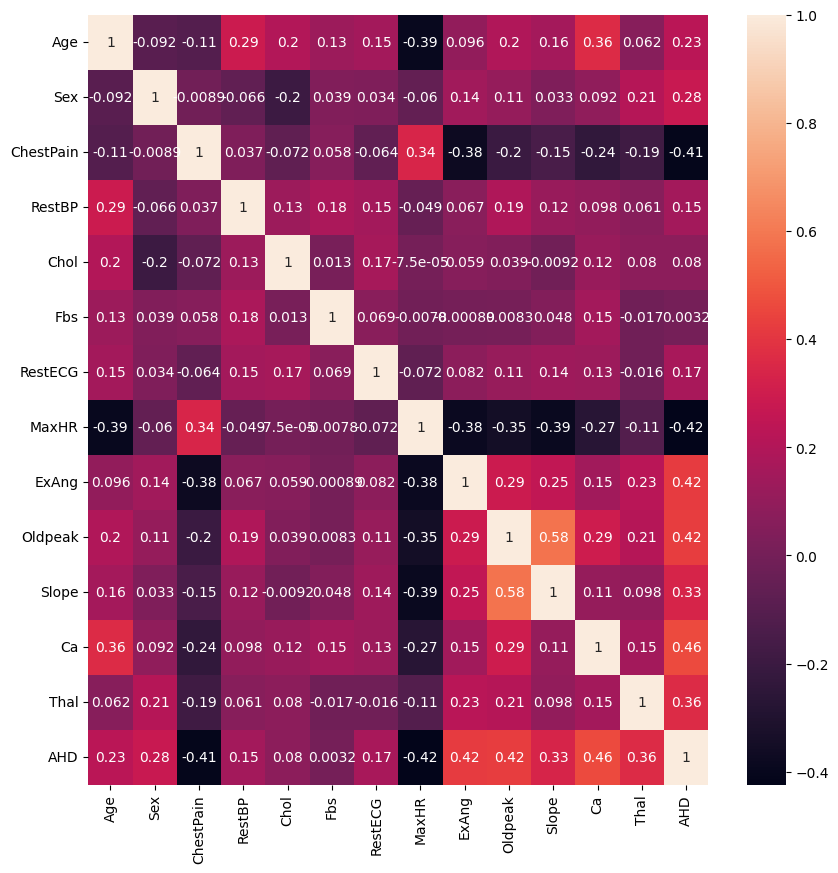

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
# print(corr)

plt.figure(figsize=(10, 10))
sns.heatmap(data = corr, annot=True)

# No multicollinearity

In [10]:
### Applying KNN to the non feature selected data
x = df.drop(columns = "AHD").values
y = df.iloc[:, -1].values
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [11]:
import numpy as np

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 3)
necls = KNeighborsClassifier(n_neighbors=10)

necls.fit(x_train, y_train)
y_pred = necls.predict(x_test)

In [13]:
# Measuring accuracy
from sklearn.metrics import accuracy_score
raw_accuracy = accuracy_score(y_test, y_pred)
print("Raw accuracy: ", raw_accuracy)

Raw accuracy:  0.6833333333333333


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[28,  3],
       [16, 13]])

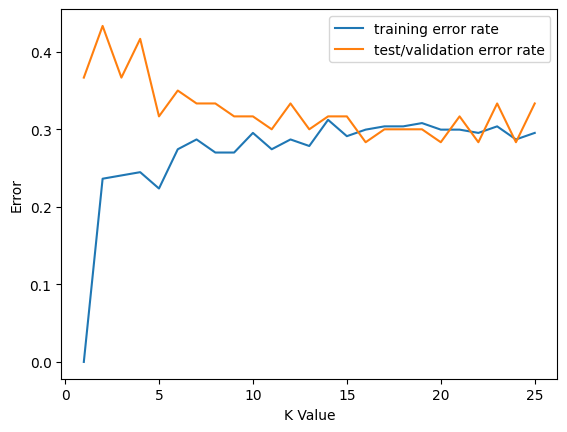

In [15]:
# Effect of K on Training Error rate and Validation Error rate
error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    x=confusion_matrix(y_train,knn.predict(x_train))
    y=confusion_matrix(y_test,knn.predict(x_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

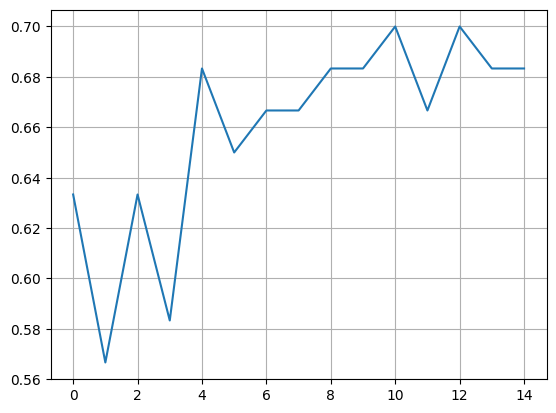

In [16]:
scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(scores)
plt.grid(True)

In [17]:
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,0.841751,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,1.326599,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.585061,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)
df_norm.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0
1,0.791667,1.0,0.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.5,1.0
2,0.791667,1.0,0.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,1.0
3,0.166667,1.0,0.333333,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.5,0.0
4,0.250000,0.0,0.666667,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.5,0.0


In [19]:
df_norm.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.280584,0.355600,0.277055,0.144781,0.498316,0.599995,0.326599,0.170251,0.301347,0.225589,0.663300,0.461279
std,0.188536,0.468500,0.321620,0.167574,0.118716,0.352474,0.497457,0.175126,0.469761,0.188084,0.309093,0.312988,0.292531,0.499340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.562500,1.000000,0.333333,0.339623,0.267123,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.500000,0.000000
75%,0.666667,1.000000,0.333333,0.433962,0.342466,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

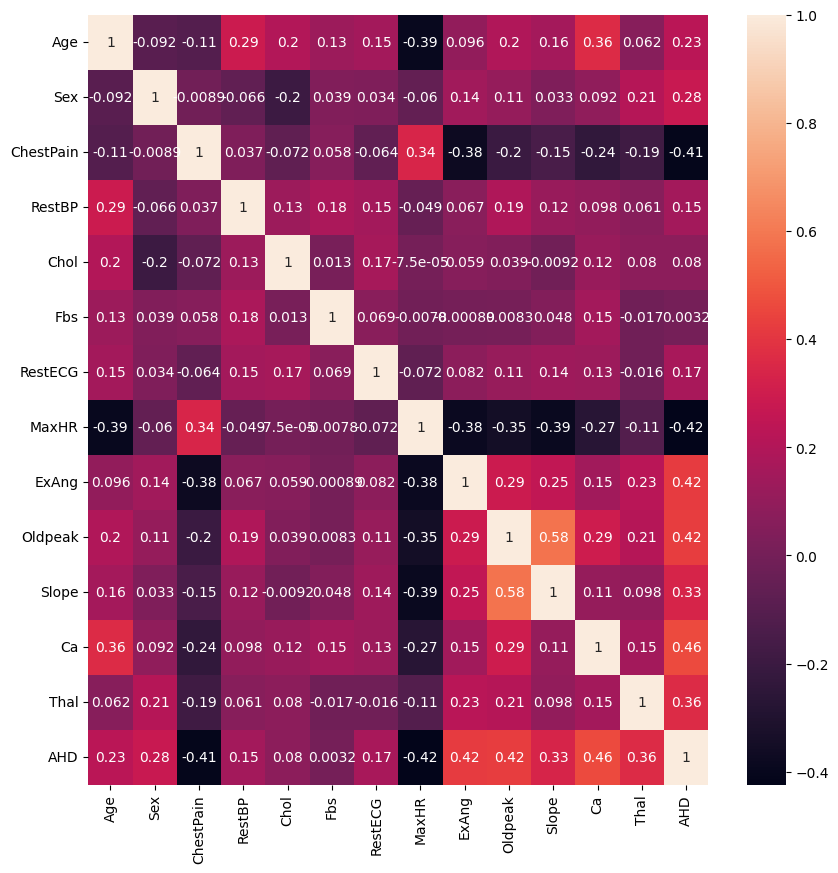

In [20]:
# FILTER BASED FEATURE SELECTION
# i. Correlation
corr_norm = df_norm.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(data = corr_norm, annot=True)

In [21]:
# ii Variance Threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)
data_values_reduced = selector.fit_transform(df_norm)

kept_features = selector.get_feature_names_out(input_features=df_norm.columns)
df_reduced = pd.DataFrame(data_values_reduced, columns=kept_features)

print(f"Original data shape: {df_norm.shape}")
print(f"Reduced data shape: {df_reduced.shape}")
print(f"Kept Features: {kept_features}")

df_reduced

Original data shape: (297, 14)
Reduced data shape: (297, 9)
Kept Features: ['Sex' 'ChestPain' 'Fbs' 'RestECG' 'ExAng' 'Slope' 'Ca' 'Thal' 'AHD']


,Sex,ChestPain,Fbs,RestECG,ExAng,Slope,Ca,Thal,AHD
0,1.0,1.000000,1.0,1.0,0.0,1.0,0.000000,0.0,0.0
1,1.0,0.000000,0.0,1.0,1.0,0.5,1.000000,0.5,1.0
2,1.0,0.000000,0.0,1.0,1.0,0.5,0.666667,1.0,1.0
3,1.0,0.333333,0.0,0.0,0.0,1.0,0.000000,0.5,0.0
4,0.0,0.666667,0.0,1.0,0.0,0.0,0.000000,0.5,0.0
...,...,...,...,...,...,...,...,...,...
292,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1.0
293,1.0,1.000000,0.0,0.0,0.0,0.5,0.000000,1.0,1.0
294,1.0,0.000000,1.0,0.0,0.0,0.5,0.666667,1.0,1.0
295,1.0,0.000000,0.0,0.0,1.0,0.5,0.333333,1.0,1.0


In [22]:
x_reduced = df_reduced.drop(columns = "AHD")
y_reduced = df.iloc[:, -1]
y_reduced

,AHD
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [23]:
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_reduced, y_reduced, test_size=0.20)

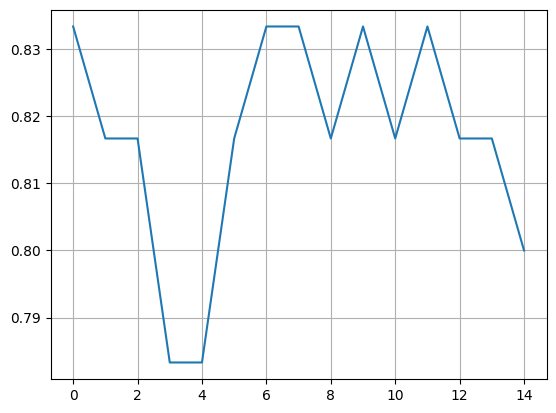

In [24]:
scores_reduced = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_red_train,y_red_train)
    y_red_pred = knn.predict(x_red_test)
    scores_reduced.append(accuracy_score(y_red_test, y_red_pred))

plt.plot(scores_reduced)
plt.grid(True)

In [25]:
necls_reduced = KNeighborsClassifier(n_neighbors=3)

necls_reduced.fit(x_red_train, y_red_train)
y_pred_best = necls_reduced.predict(x_red_test)

red_accuracy = accuracy_score(y_red_test, y_red_pred)
print("Raw Accuracy Score: ", raw_accuracy)
print("Reduced Accuracy Score: ", red_accuracy)

Raw Accuracy Score:  0.6833333333333333
Reduced Accuracy Score:  0.8
